<a href="https://colab.research.google.com/github/duongtran96/Project-Image-Depth/blob/Feature/Project_Image_depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip tsukuba.zip

Archive:  tsukuba.zip
mapname:  conversion of  failed
 extracting: left.png                
 extracting: right.png               
 extracting: groundtruth.png         


# **Problem 1**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
def distance_l1(x, y):
    return abs(x - y)

In [ ]:
def pixel_wise_matching_l1(left_img, right_img, disparity_range, save_result = True):

    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # create blank disparity map
    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255

    for y in range(height):
        for x in range(width):
            # Find j where has minimum value
            disparity = 0
            cost_min = max_value

            for j in range(disparity_range):
                cost = max_value if (x - j) < 0 else distance_l1(int(left[y, x]), int(right[y, x - j]))

                if cost < cost_min:
                    cost_min = cost
                    disparity = j

            depth[y, x] = disparity * scale

    if save_result == True:
        print("Saving result...")

        # Save results
        cv2.imwrite(f"pixel_wise_l1.png", depth)
        cv2.imwrite(f"pixel_wist_l1_color.png", cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print("Done")
    return depth

In [ ]:
def distance_l2(x, y):
    return (x -y)**2

In [ ]:
def pixel_wise_matching_l2(left_img, right_img, disparity_range, save_result = True):
    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255**2

    for y in range(height):
        for x in range(width):
            #find j where cost has minimum value

            disparity = 0
            cost_min = max_value

            for j in range(disparity_range):
                cost = max_value if (x - j) < 0 else distance_l2(int(left[y, x]), int(right[y, x - j]))

                if cost < cost_min:
                    cost_min = cost
                    disparity = j

            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result')

        cv2.imwrite(f"pixel_wise_l2.png", depth)
        cv2.imwrite(f"pixel_wise_l2_color.png", cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print("Done")
    return depth

Saving result...
Done


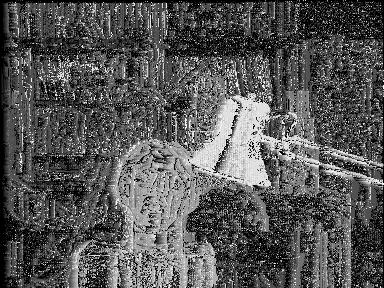

Saving result
Done


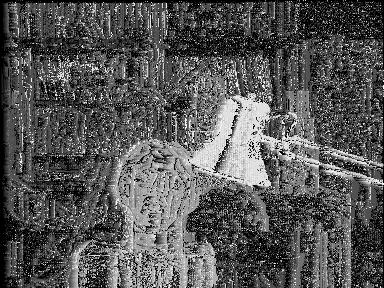

In [ ]:
left_img_path = '/content/left.png'
right_img_path = '/content/right.png'
disparity_range = 16

pixel_wise_result_l1 = pixel_wise_matching_l1(left_img_path, right_img_path, disparity_range, save_result = True)
cv2_imshow(pixel_wise_result_l1)

pixel_wise_result_l2 = pixel_wise_matching_l2(left_img_path, right_img_path, disparity_range, save_result = True)
cv2_imshow(pixel_wise_result_l2)

# **Problem 2**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
def distance_l1(x, y):
    return abs(x - y)

In [ ]:
def window_based_mathching_l1(left_img, right_img, disparity_range, kernel_size = 5, save_result = True):

    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map

    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 * 9

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            # Find j where cost has minimum value
            disparity = 0
            cost_min = 65534

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = distance_l1(int(left[y + v, x + u]), int(right[y + v, (x + u) - j]))

                        total += value

                    if total < cost_min:
                        cost_min = total
                        disparity = j

                depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result')

        cv2.imwrite(f"window_based_l1.png", depth)
        cv2.imwrite(f"window_based_color.png", cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print("Done")
    return depth

In [ ]:
def distance_l2(x, y):
    return (x - y)**2

In [ ]:
def window_based_mathching_l2(left_img, right_img, disparity_path, kernel_size = 5, save_result = True):

    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = (255**2) * 9

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):

            disparity = 0
            cost_min = 65534

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = distance_l2(int(left[y + v, x + u]), int(right[y + v, (x + u) - j]))

                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            depth[y, x] = disparity * scale

    if save_result == True:
        print("Saving result:...")

        cv2.imwrite(f"window_based_l1.png", depth)
        cv2.imwrite(f"window_based_color.png", cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print("Done")
    return depth

In [ ]:
!unzip Aloe_images.zip

Archive:  Aloe_images.zip
  inflating: Aloe/Aloe_left_1.png    
  inflating: Aloe/Aloe_right_3.png   
  inflating: Aloe/Aloe_right_1.png   
  inflating: Aloe/Aloe_right_2.png   
  inflating: Aloe/Disparity_map_corr.png  


Saving result
Done


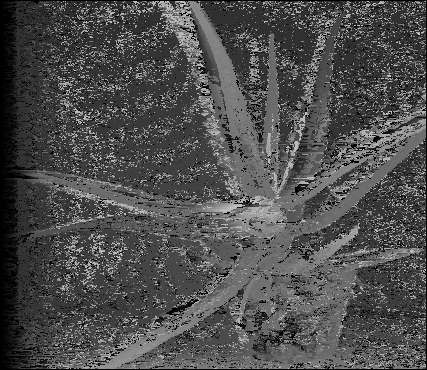

Saving result:...
Done


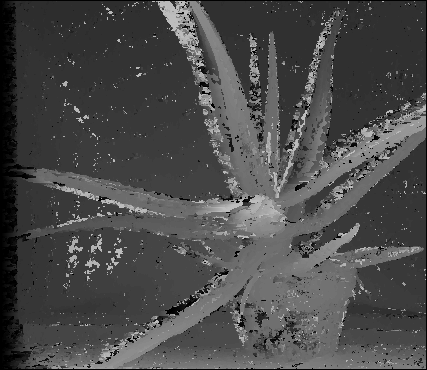

In [ ]:
left_img_path = "/content/Aloe/Aloe_left_1.png"
right_img_path = "/content/Aloe/Aloe_right_1.png"
disparity_range = 64
kernel_size = 3

window_based_result_l1 = window_based_mathching_l1(left_img_path, right_img_path, disparity_range, kernel_size, save_result = True)
cv2_imshow(window_based_result_l1)

window_based_result_l2 = window_based_mathching_l2(left_img_path, right_img_path, disparity_range, kernel_size, save_result = True)
cv2_imshow(window_based_result_l2)

# **Problem 3**

Saving result:...
Done


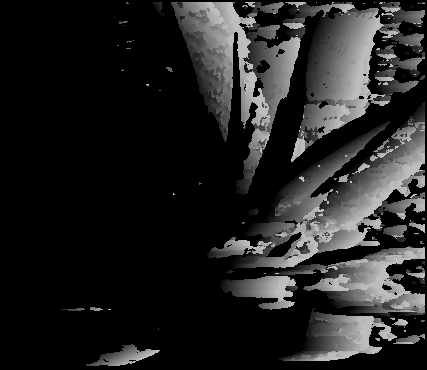

In [ ]:
left_img_path_2 = "/content/Aloe/Aloe_right_3.png"
right_img_path_2 = "/content/Aloe/Aloe_right_2.png"
disparity_range = 64
kernel_size = 5

window_based_result_l3 = window_based_mathching_l2(left_img_path_2, right_img_path_2, disparity_range, kernel_size, save_result = True)
cv2_imshow(window_based_result_l3)

# **Problem 4**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
def cosine_similarity(x, y):
    numerator = np.dot(x, y)
    denominator = np.linalg.norm(x) * np.linalg.norm(y)

    return numerator / denominator

def window_base_matching_cosine(left_img, right_img, disparity_range, kernel_size = 5, save_result = True):

    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[ : 2]

    # create blank disparity map
    depth = np.zeros((height, width), np.uint8)
    kernel_half = int((kernel_size - 1) / 2)
    scale = 3

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            # Find j where cost has minimum value
            disparity = 0
            cost_optimal = -1

            for j in range(disparity_range):
                d = x - j
                cost = -1
                if (d - kernel_half) > 0:
                    wp = left[(y - kernel_half): (y + kernel_half) + 1, (x - kernel_half) : (x + kernel_half) + 1]
                    wqd = right[(y - kernel_half): (y + kernel_half) + 1, (d - kernel_half) : (d + kernel_half) + 1]

                    wp_flattened = wp.flatten()
                    wqd_flattened = wqd.flatten()

                    cost = cosine_similarity(wp_flattened, wqd_flattened)

                if cost > cost_optimal:
                    cost_optimal = cost
                    disparity = j

            depth[y, x] = disparity * scale

    if save_result == True:
        print("Saving result...")

        cv2.imwrite("window_based_cosine_similarity.png", depth)
        cv2.imwrite("window_based_cosine_similarity_color.png", cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print("Done")
    return depth

Saving result...
Done


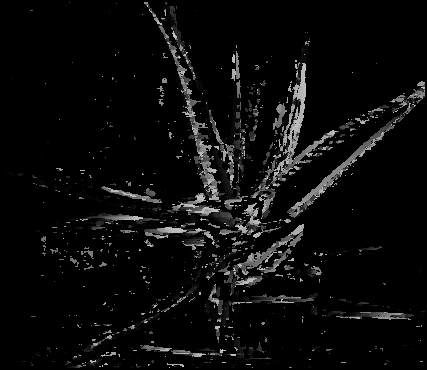

In [ ]:
left_img_path_2 = "/content/Aloe/Aloe_right_3.png"
right_img_path_2 = "/content/Aloe/Aloe_right_2.png"
disparity_range = 64
kernel_size = 5

window_based_result_cosine = window_base_matching_cosine(left_img_path_2, right_img_path_2, disparity_range, kernel_size, save_result = True)
cv2_imshow(window_based_result_cosine)